In [9]:
import numpy as np 
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [59]:
def cepstrum_implement(x):
    
    p = np.poly1d(x)
    roots = p.r
    N = 500
    n_positive = np.arange(1,N+1).astype(np.float64)
    n_negative = np.arange(-N,0).astype(np.float64)
    
    cep_positive = np.arange(N+1,N+1+N)
    cep_negative = np.arange(0,N)
    cep = np.zeros(2*N+1).astype(np.complex128)
    
    minimum = 1e-6
    A = x[x>minimum][0]
    for value in roots:
        if abs(value) > minimum:
            if abs(value) < 1+minimum:
                cep[cep_positive] = cep[cep_positive]-np.power(value, n_positive)/n_positive
            else:
                cep[cep_negative] = cep[cep_negative]+np.power(1/value, -n_negative)/n_negative
                A = A*(-value)
    cep[N] = np.log(A)
    return cep

def inverse_cepstrum(cep1, output_length):
    Lm = output_length
    N = 500
    Lm1 = Lm*2+1
    flt = 1
    minimum = 1e-6
    
    gmx = 100
    gm = np.array([math.gamma(i+1) for i in range(gmx+1)])
    
    for a2 in range(N):
        a21 = N-a2
        if abs(cep1[a2])>minimum:
            ff = np.zeros(Lm+1).astype(np.complex128)
            md = np.min([Lm//a21,gmx])
            index = np.linspace(0,0+a21*md,num=md+1,endpoint=True).astype(np.int64)
            ff[index] = np.power(cep1[a2],np.arange(md+1))/gm[:md+1]
            flt = np.convolve(flt,ff)
            flt = flt[:Lm+1]

    exp_x = flt[np.arange(Lm,-1,-1)]*np.exp(cep1[N])
    xa = np.concatenate((exp_x, np.zeros(Lm)))
#     xa=[np.zeros(Lm),1,np.zeros(Lm)]
    for a3 in range(1,N+1):
        a31 = N+a3
        if abs(cep1[a31])>minimum:
            ff = np.zeros(Lm+1).astype(np.complex128)
            md = np.min([Lm//a3,gmx])
            index = np.linspace(0,0+a3*md,num=md+1,endpoint=True).astype(np.int64)
            ff[index]=np.power(cep1[a31],np.arange(md+1))/gm[:md+1]
            xa = np.convolve(xa,ff)
            xa = xa[:Lm1]
    return xa

In [77]:
fs = 102400
f = 5000
duration_count = int(fs/f*1)
# duration_count = int(fs*0.001)
time_s = (np.arange(duration_count)+1)/fs
# f = (8000-3000)/0.001*time_s + 3000

s = np.sin(2*np.pi*f*time_s)
# window = np.hanning(len(s))
window = np.ones(len(s))
window_s = s*window
duration_total = int(0.01*fs)
time = np.arange(duration_total)/fs
s_origin = np.concatenate((window_s, np.zeros(duration_total-len(s))))

In [106]:
time_delay_1 = 2/1500
alpha_1 = 0.01
s_1 = np.concatenate((np.zeros(int(time_delay_1*fs)), alpha_1*window_s))
s_1 = np.concatenate((s_1, np.zeros(duration_total-len(s_1))))

np.random.seed(0)
signal_distorted = s_origin + s_1 + 0.001*np.random.randn(len(s_origin))

<IPython.core.display.Javascript object>


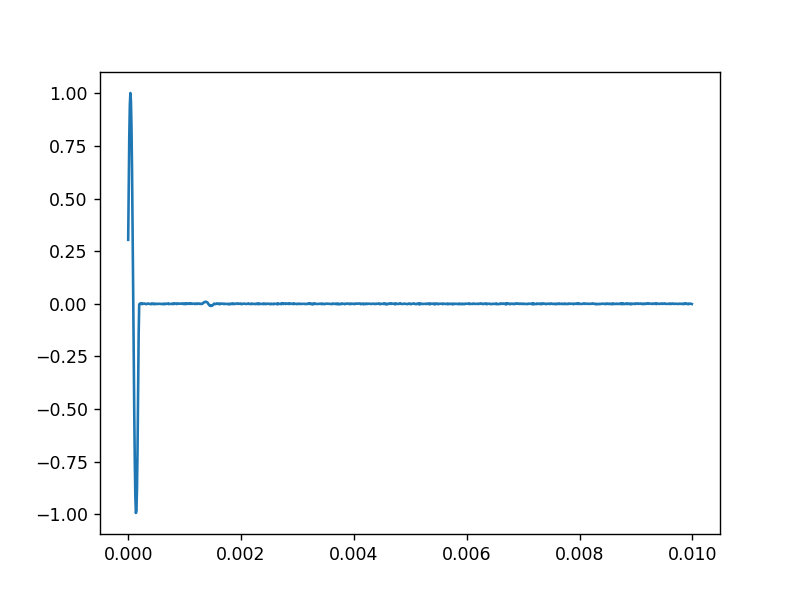

In [107]:
fig, ax = plt.subplots()
ax.plot(time, signal_distorted)

<IPython.core.display.Javascript object>


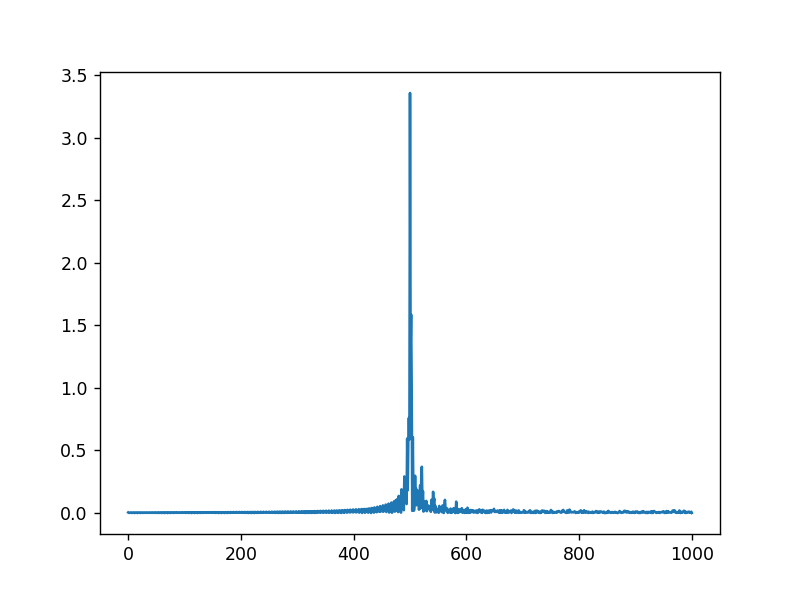

In [108]:
cep = cepstrum_implement(signal_distorted)
fig, ax = plt.subplots()
ax.plot(abs(cep))

<IPython.core.display.Javascript object>


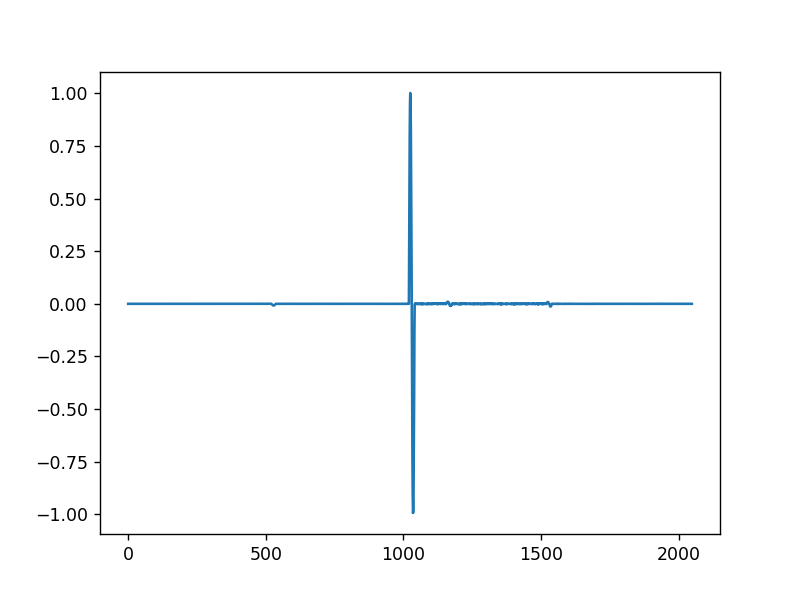

In [109]:
x = inverse_cepstrum(cep, len(signal_distorted))
fig, ax = plt.subplots()
index = np.arange(len(signal_distorted)*2+1)-len(signal_distorted)
ax.plot(np.real(x))
# ax.set_xlim([-10,len(signal_distorted)])